# Proposed project - Reduced Food Access

I started the project to understand the health consequence of reduced access to high-quality food, and identifying possible low-cost solutions. Following the data opened some interesting insights to factors that drive reduced food access and alternative solutions that I had not originally thought of. 

Motivation:
Originally I wanted to see if the USDA’s Food Atlas dataset would show any correlation between reduced access to food and increased adverse health events.

Original data sources:
I used the following data sources:

<br>1) https://www.ers.usda.gov/data-products/food-environment-atlas/documentation/
<br>2) https://www.healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer
<br>3) https://www.kaggle.com/mikejohnsonjr/united-states-crime-rates-by-county

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

The first data set I am looking at is the USDA's Food Environment Atlas indicators, grouped under the following categories:<br>

<br>Access and Proximity to Grocery Store
<br>Store Availability
<br>Restaurant Availability and Expenditures
<br>Food Assistance
<br>State Food Insecurity
<br>Food Prices and Taxes
<br>Local Foods
<br>Health and Physical Activity
<br>Socioeconomic Characteristics
<br>
<br>
I am initially focused on the "Access and Proimity to Grocery Stores section"

In [2]:
df_access = pd.read_excel('foodAtlas.xls',sheet_name='ACCESS')

In [3]:
df_access.columns

Index(['FIPS', 'State', 'County', 'Population low access to store 2010',
       'Population low access to store 2015',
       'Population low access to store (% change) 2010 -15',
       'Population low access to store (%) 2010',
       'Population low access to store (%) 2015',
       'Low income & low access to store 2010',
       'Low income & low access to store 2015',
       'Low income & low access to store (% change) 2010 - 15',
       'Low income & low access to store (%) 2010',
       'Low income & low access to store (%) 2015',
       'Households no car & low access to store 2010',
       'Households no car & low access to store 2015',
       'Households no car & low access to store (% change) 2010 - 15',
       'Households no car & low access to store (%) 2010',
       'Households no car & low access to store (%) 2015',
       'SNAP households low access to store 2015',
       'SNAP households low access to store (%) 2015',
       'Children low access to store 2010',
       

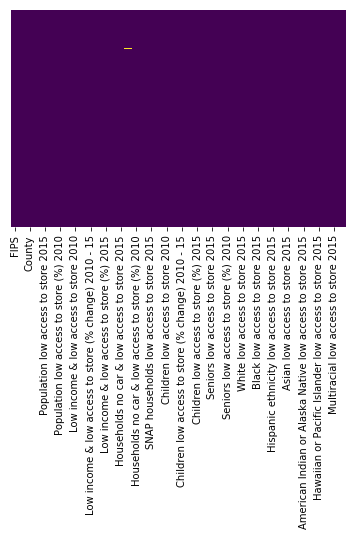

In [4]:
sns.heatmap(df_access.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since there are a lot of columns that data in my opinion overlap, will not help with an initial overview, and I am not missing many values I decided to drop most of the data for now except the 2015 data.

In [5]:
df_access_2015 = df_access.drop(['Population low access to store 2010',
                                'Population low access to store (% change) 2010 -15',
                                'Population low access to store (%) 2010',
                                'Population low access to store (%) 2015',
                                'Low income & low access to store 2010',
                                'Low income & low access to store (% change) 2010 - 15',
                                'Low income & low access to store (%) 2010',
                                'Low income & low access to store (%) 2015',
                                'Households no car & low access to store 2010',
                                'Households no car & low access to store (% change) 2010 - 15',
                                'Households no car & low access to store (%) 2010',
                                'Households no car & low access to store (%) 2015',
                                'SNAP households low access to store (%) 2015',
                                'Children low access to store 2010',
                                'Children low access to store (% change) 2010 - 15',
                                'Children low access to store (%) 2010',
                                'Children low access to store (%) 2015',
                                'Seniors low access to store 2010',
                                'Seniors low access to store (% change) 2010 -15',
                                'Seniors low access to store (%) 2010',
                                'Seniors low access to store (%) 2015',
                                'White low access to store (%) 2015',
                                'Black low access to store (%) 2015',
                                'Hispanic ethnicity low access to store (%) 2015',
                                'Asian low access to store (%) 2015',
                                'American Indian or Alaska Native low access to store (%) 2015',
                                'Hawaiian or Pacific Islander low access to store (%) 2015',
                                'Multiracial low access to store (%) 2015'],axis=1)

In [6]:
df_access_2015.columns

Index(['FIPS', 'State', 'County', 'Population low access to store 2015',
       'Low income & low access to store 2015',
       'Households no car & low access to store 2015',
       'SNAP households low access to store 2015',
       'Children low access to store 2015', 'Seniors low access to store 2015',
       'White low access to store 2015', 'Black low access to store 2015',
       'Hispanic ethnicity low access to store 2015',
       'Asian low access to store 2015',
       'American Indian or Alaska Native low access to store 2015',
       'Hawaiian or Pacific Islander low access to store 2015',
       'Multiracial low access to store 2015'],
      dtype='object')

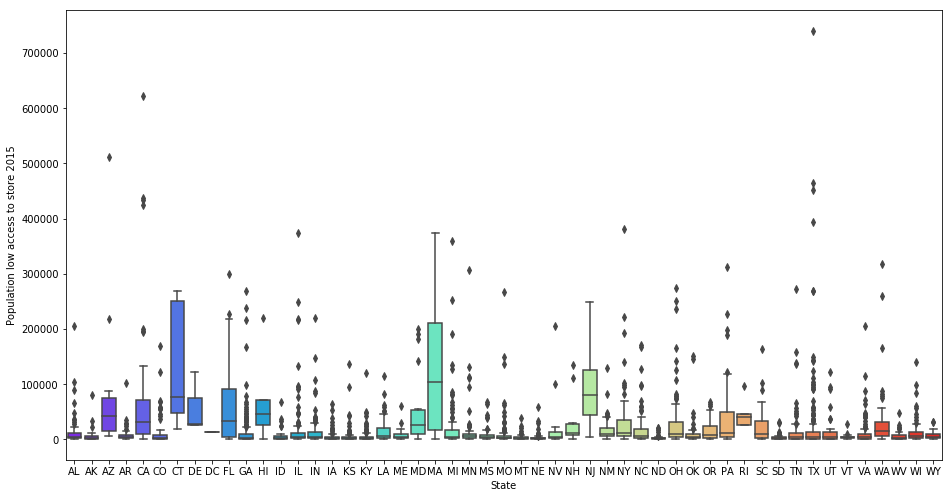

In [7]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Population low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

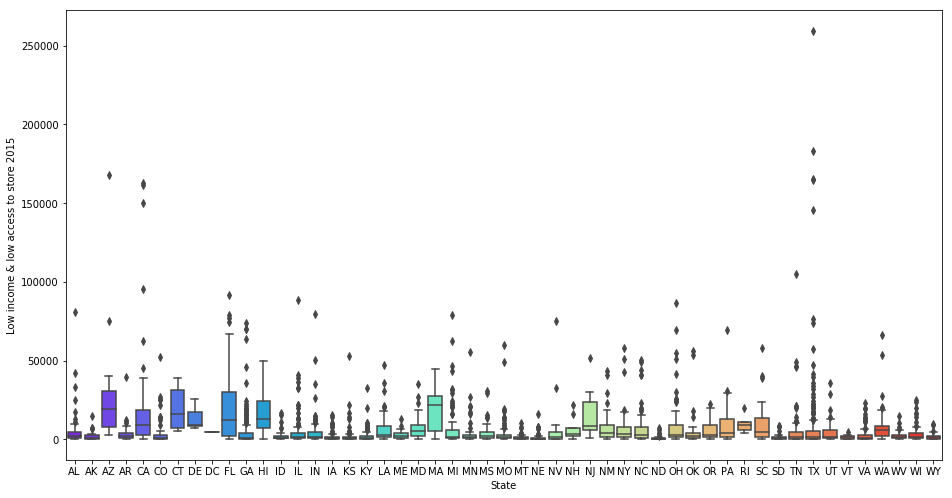

In [8]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Low income & low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

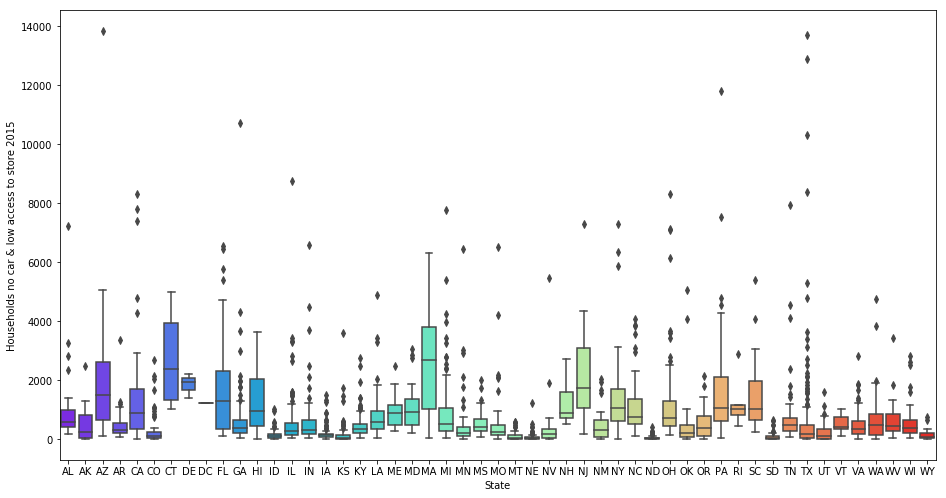

In [9]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Households no car & low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

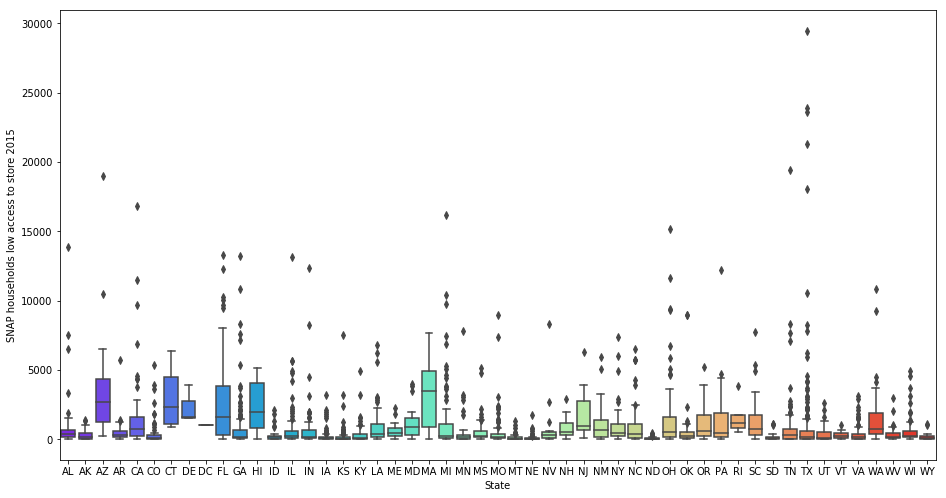

In [10]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='SNAP households low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

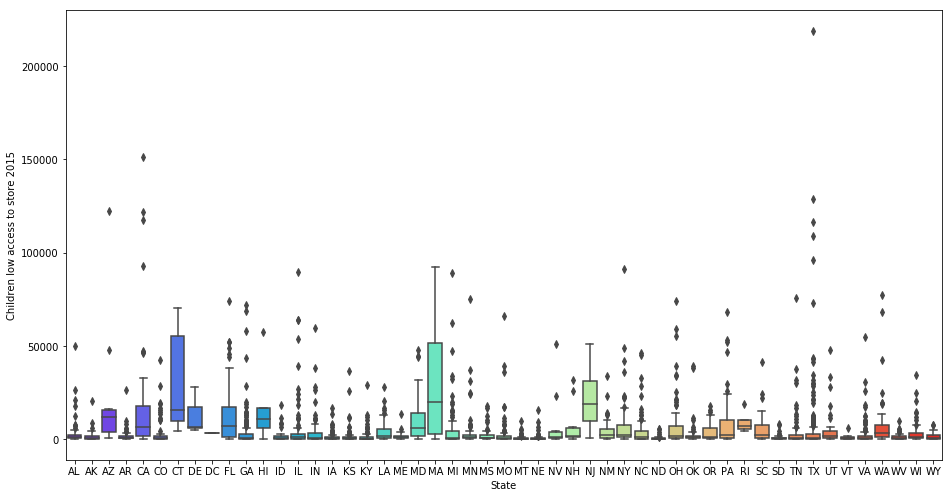

In [11]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Children low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

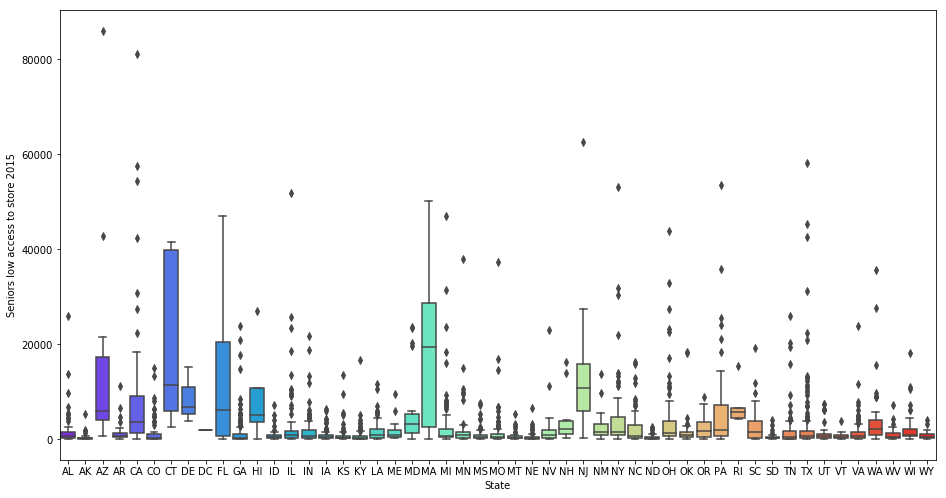

In [12]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Seniors low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

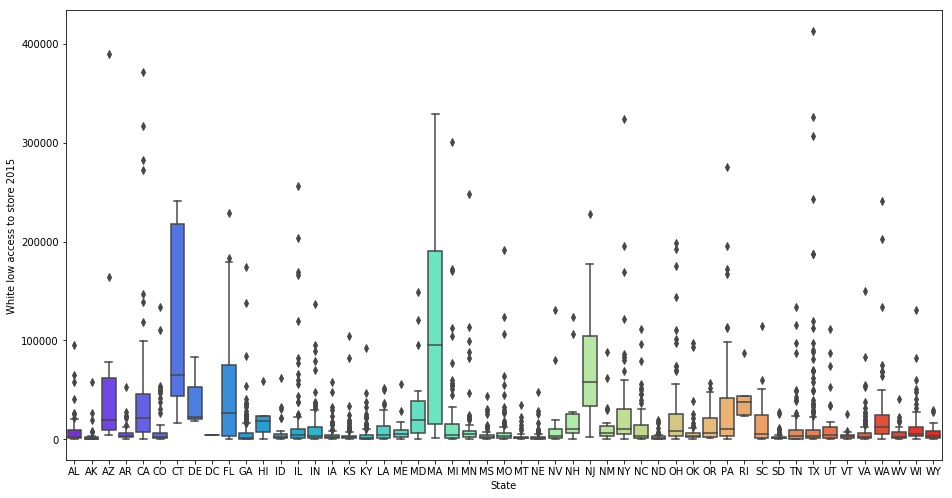

In [13]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='White low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

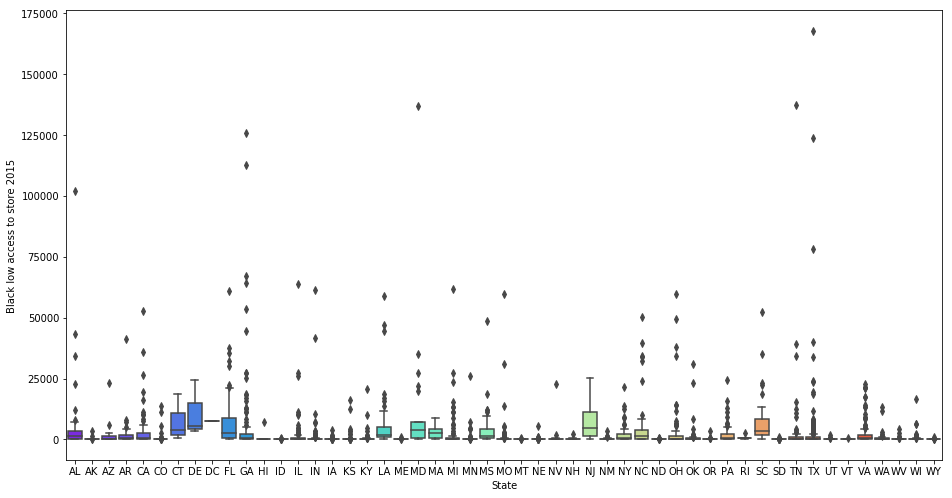

In [14]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Black low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

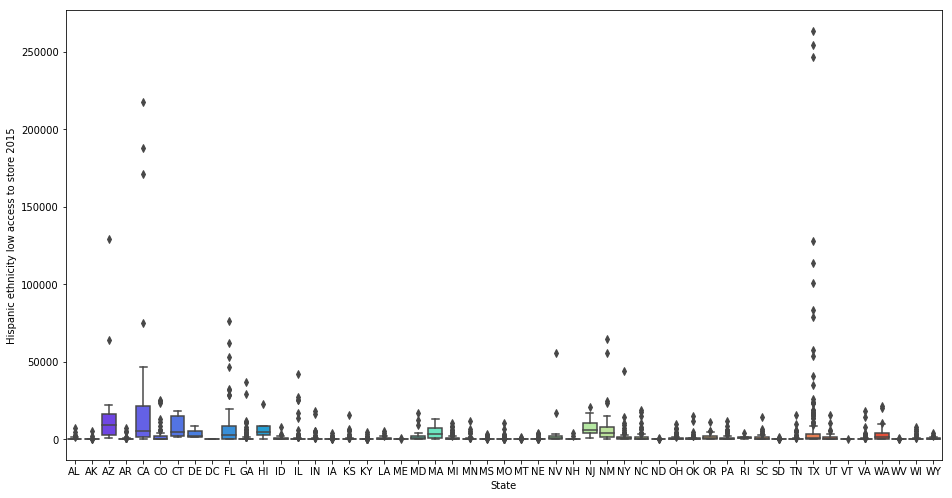

In [15]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Hispanic ethnicity low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

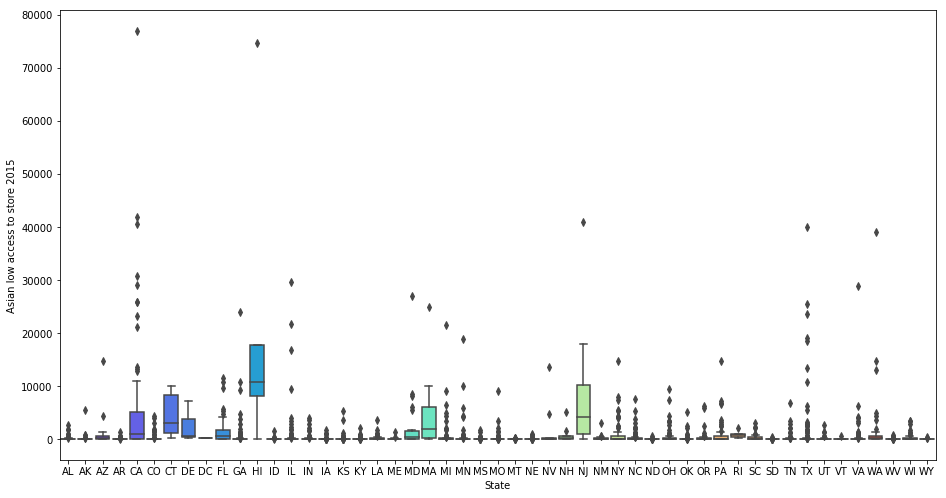

In [16]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Asian low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

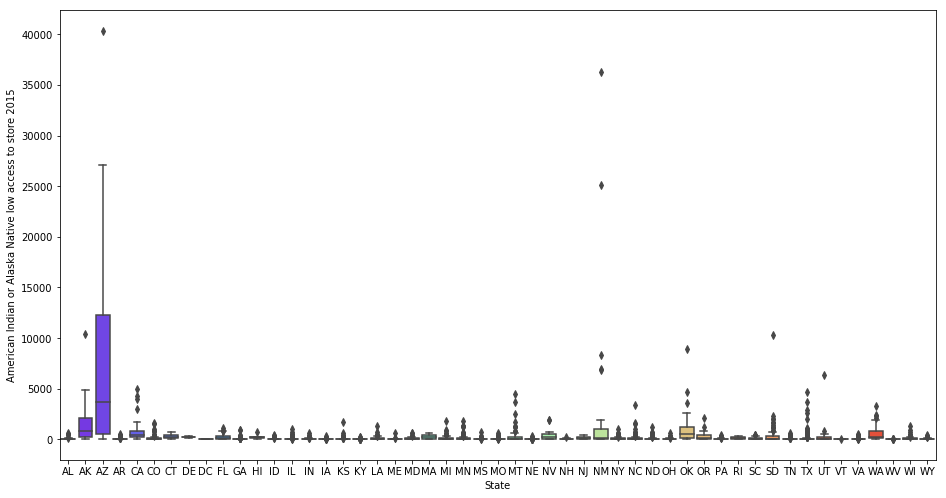

In [17]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='American Indian or Alaska Native low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

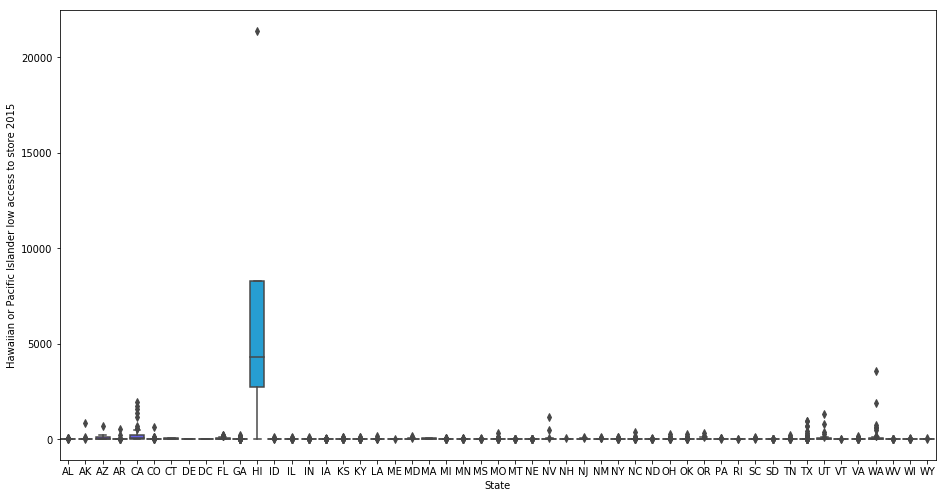

In [18]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Hawaiian or Pacific Islander low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

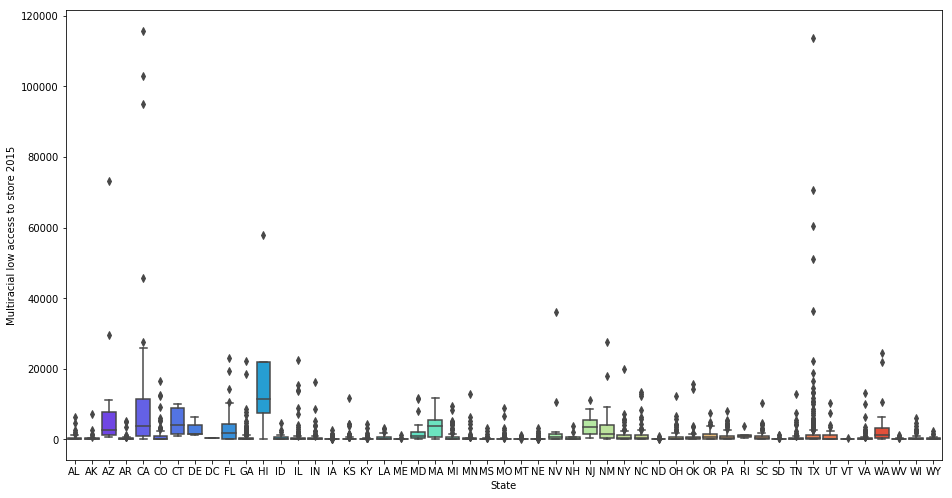

In [19]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='State', y='Multiracial low access to store 2015', data=df_access_2015,palette='rainbow',ax=ax)

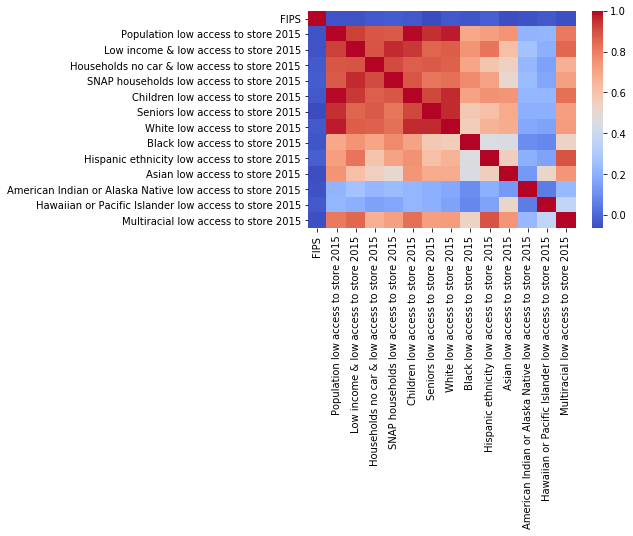

In [20]:
sns.heatmap(df_access_2015.corr(),cmap='coolwarm',annot=False)

In [21]:
df_health = pd.read_excel('foodAtlas.xls',sheet_name='HEALTH')

In [22]:
df_health.columns

Index(['FIPS', 'State', 'County', 'Adult diabetes rate 2008',
       'Adult diabetes rate 2013', 'Adult obesity rate 2008',
       'Adult obesity rate 2013', 'High schoolers physically active (%) 2015*',
       'Recreation & fitness facilities 2009',
       'Recreation & fitness facilities 2014',
       'Recreation & fitness facilities (% change) 2009-14',
       'Recreation & fitness facilities/1000 pop 2009',
       'Recreation & fitness facilities/1000 pop 2014',
       'Recreation & fitness facilities/1000 pop (% change) 2009-14'],
      dtype='object')

In [23]:
df_health = pd.merge(df_health, df_access_2015, how='right', on=['FIPS', 'State', 'County'])
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 27 columns):
FIPS                                                           3143 non-null int64
State                                                          3143 non-null object
County                                                         3143 non-null object
Adult diabetes rate 2008                                       3138 non-null float64
Adult diabetes rate 2013                                       3142 non-null float64
Adult obesity rate 2008                                        3138 non-null float64
Adult obesity rate 2013                                        3142 non-null float64
High schoolers physically active (%) 2015*                     2025 non-null float64
Recreation & fitness facilities 2009                           3143 non-null int64
Recreation & fitness facilities 2014                           3143 non-null int64
Recreation & fitness facilities (% change) 2009-14 

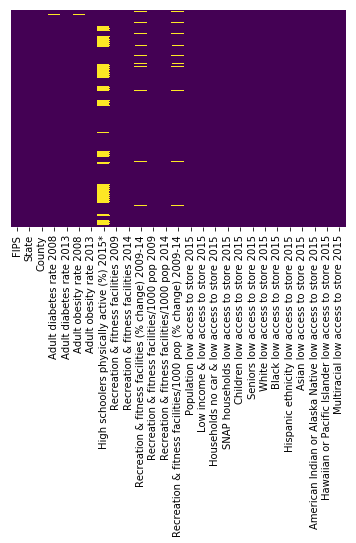

In [24]:
sns.heatmap(df_health.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df_health = df_health.drop(['High schoolers physically active (%) 2015*'],axis=1)

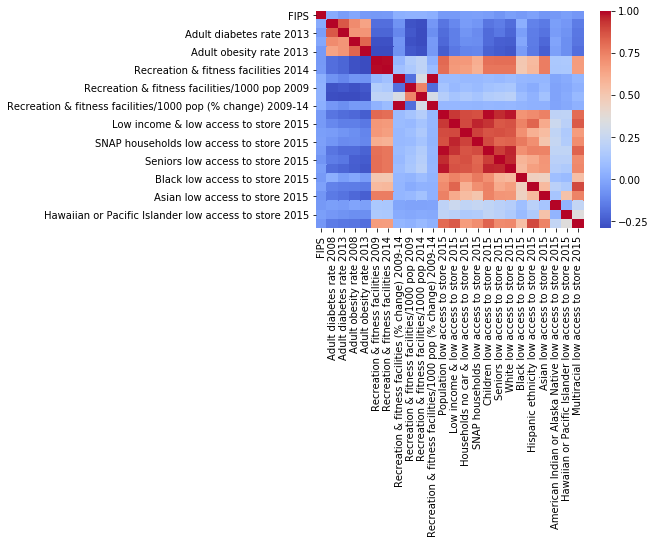

In [26]:
sns.heatmap(df_health.corr(),cmap='coolwarm',annot=False)

Notice the correlation between "recreation facilities" but not the other health factors.

In [27]:
df_economic = pd.read_excel('foodAtlas.xls',sheet_name='SOCIOECONOMIC')

In [28]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 18 columns):
FIPS                                       3143 non-null int64
State                                      3143 non-null object
County                                     3143 non-null object
% White 2010                               3143 non-null float64
% Black 2010                               3143 non-null float64
% Hispanic 2010                            3143 non-null float64
% Asian 2010                               3143 non-null float64
% American Indian or Alaska Native 2010    3143 non-null float64
% Hawaiian or Pacific Islander 2010        3143 non-null float64
% Population 65 years or older 2010        3143 non-null float64
% Population under age 18 2010             3143 non-null float64
Median household income 2015               3139 non-null float64
Poverty rate 2015                          3139 non-null float64
Persistent-poverty counties 2010           3143 non-

In [29]:
df_economic = pd.merge(df_economic, df_access_2015, how='right', on=['FIPS', 'State', 'County'])
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 31 columns):
FIPS                                                         3143 non-null int64
State                                                        3143 non-null object
County                                                       3143 non-null object
% White 2010                                                 3143 non-null float64
% Black 2010                                                 3143 non-null float64
% Hispanic 2010                                              3143 non-null float64
% Asian 2010                                                 3143 non-null float64
% American Indian or Alaska Native 2010                      3143 non-null float64
% Hawaiian or Pacific Islander 2010                          3143 non-null float64
% Population 65 years or older 2010                          3143 non-null float64
% Population under age 18 2010                               3143 n

In [30]:
df_economic.columns

Index(['FIPS', 'State', 'County', '% White 2010', '% Black 2010',
       '% Hispanic 2010', '% Asian 2010',
       '% American Indian or Alaska Native 2010',
       '% Hawaiian or Pacific Islander 2010',
       '% Population 65 years or older 2010', '% Population under age 18 2010',
       'Median household income 2015', 'Poverty rate 2015',
       'Persistent-poverty counties 2010', 'Child poverty rate 2015',
       'Persistent-child-poverty counties 2010',
       'Metro/nonmetro counties 2010', 'Population-loss counties 2010',
       'Population low access to store 2015',
       'Low income & low access to store 2015',
       'Households no car & low access to store 2015',
       'SNAP households low access to store 2015',
       'Children low access to store 2015', 'Seniors low access to store 2015',
       'White low access to store 2015', 'Black low access to store 2015',
       'Hispanic ethnicity low access to store 2015',
       'Asian low access to store 2015',
       'America

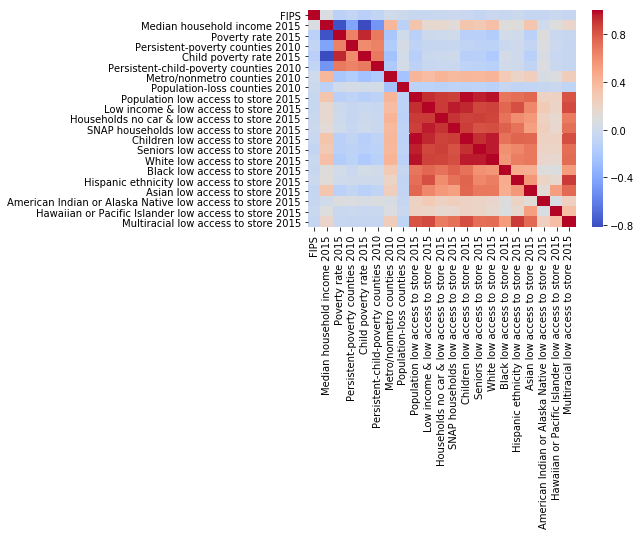

In [31]:
df_economic = df_economic.drop(['% White 2010',
                                '% Black 2010',
                                '% Hispanic 2010',
                                '% Asian 2010',
                                '% American Indian or Alaska Native 2010',
                                '% Hawaiian or Pacific Islander 2010',
                                '% Population 65 years or older 2010',
                                '% Population under age 18 2010'],axis=1)

sns.heatmap(df_economic.corr(),cmap='coolwarm',annot=False)

At this point, I wasn't seeing that much correlation within the data from the food atlas and health outcomes and I was starting to see more in the facilities and socioeconomic but still not that great of a correlation.
<br>
<br>
I decided to import the additional adverse health outcomes which I had downloaded.

In [32]:
df_sumlife = pd.read_csv('SUMMARYMEASURESOFHEALTH_cleaned.csv')

In [33]:
df_sumlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
State_FIPS_Code                                                                          3141 non-null int64
County_FIPS_Code                                                                         3141 non-null int64
CHSI_County_Name                                                                         3141 non-null object
CHSI_State_Name                                                                          3141 non-null object
CHSI_State_Abbr                                                                          3141 non-null object
Strata_ID_Number                                                                         3141 non-null int64
County data average life expectancy                                                      3139 non-null float64
Tenth percentile from peer counties average life expectancy                              3139 non-null float64
Nintieth perce

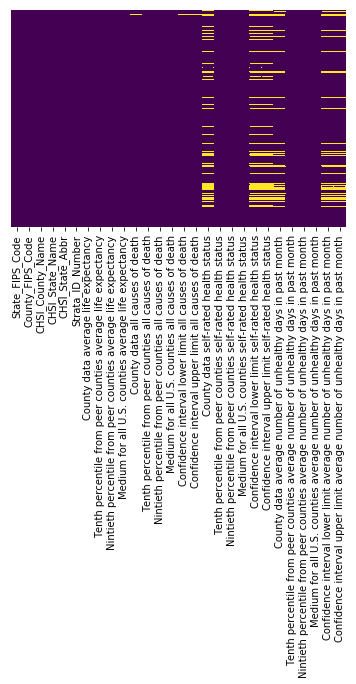

In [34]:
sns.heatmap(df_sumlife.isnull(),yticklabels=False,cbar=False,cmap='viridis')

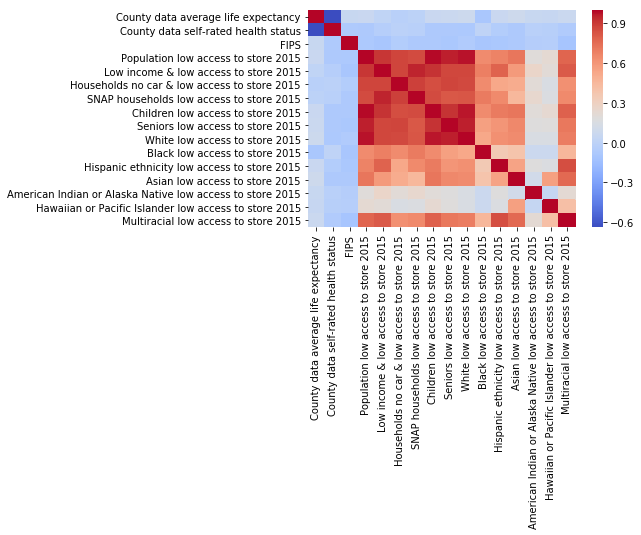

In [35]:
temp_df = df_sumlife[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data average life expectancy',
                      'County data self-rated health status']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

In [36]:
df_leadDeath = pd.read_csv('LEADINGCAUSESOFDEATH_cleaned.csv')

In [37]:
df_leadDeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Columns: 235 entries, State_FIPS_Code to Time period of reported data for national leading causes of dealth
dtypes: float64(228), int64(3), object(4)
memory usage: 5.6+ MB


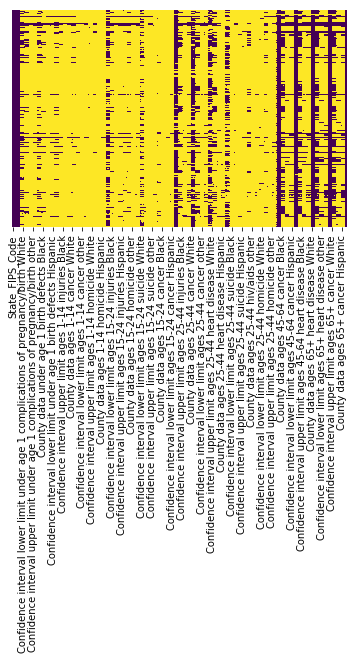

In [38]:
sns.heatmap(df_leadDeath.isnull(),yticklabels=False,cbar=False,cmap='viridis')

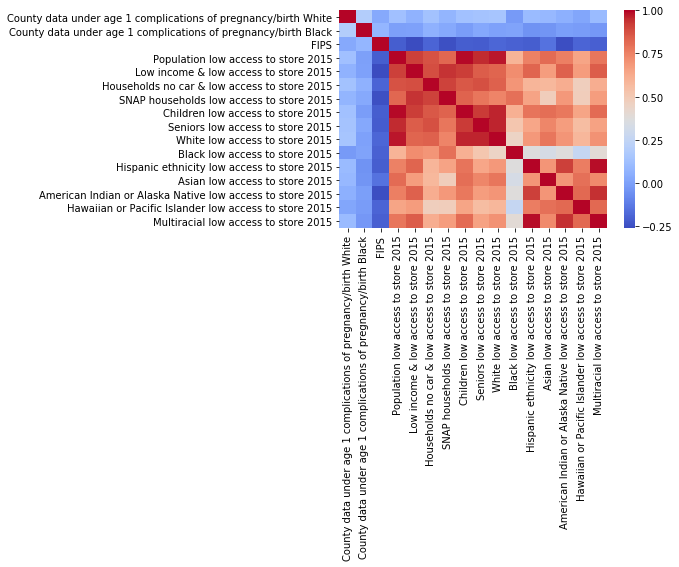

In [39]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data under age 1 complications of pregnancy/birth White',
                      'County data under age 1 complications of pregnancy/birth Black']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

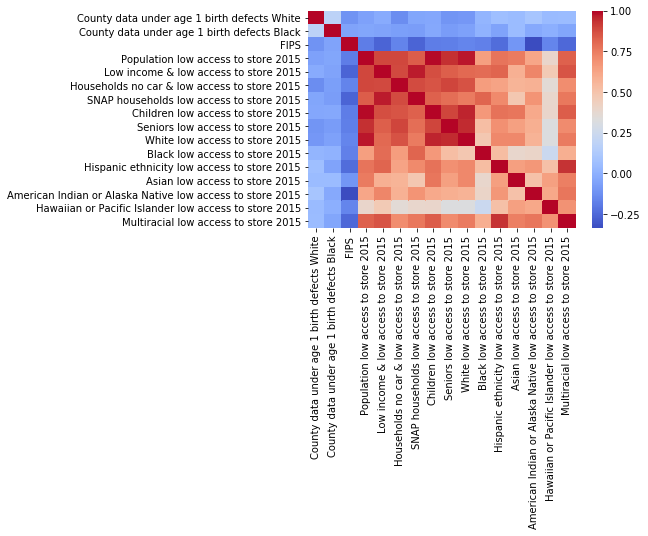

In [40]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data under age 1 birth defects White',
                      'County data under age 1 birth defects Black']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

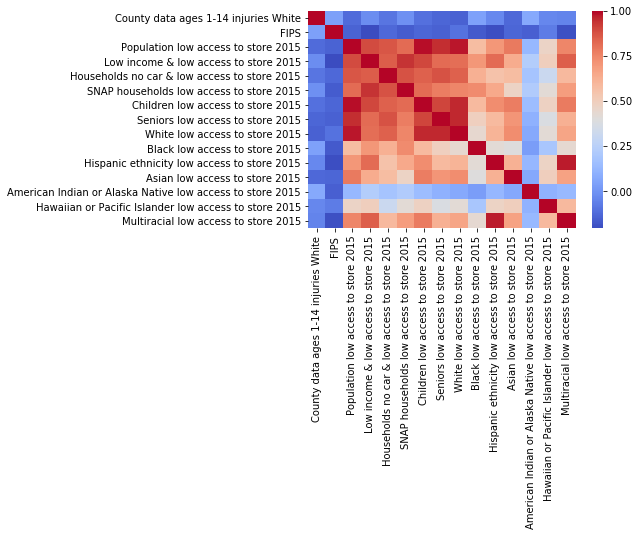

In [41]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',                      
                      'County data ages 1-14 injuries White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

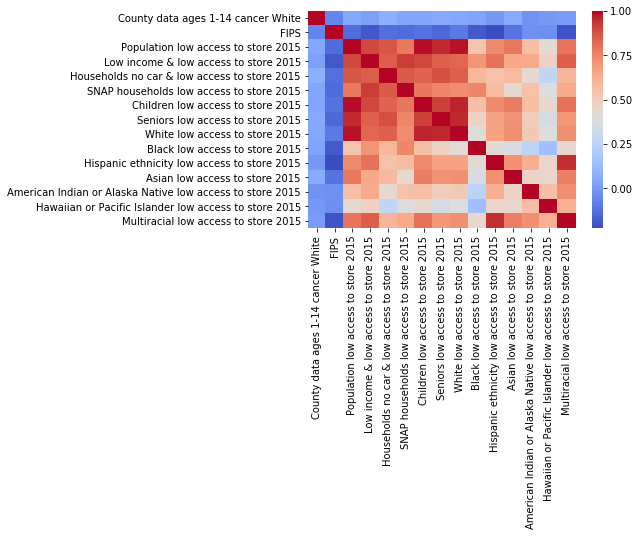

In [42]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 1-14 cancer White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

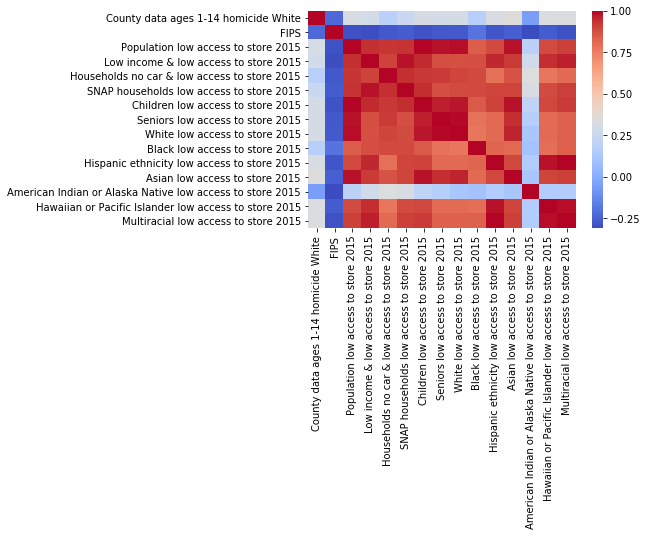

In [43]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 1-14 homicide White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

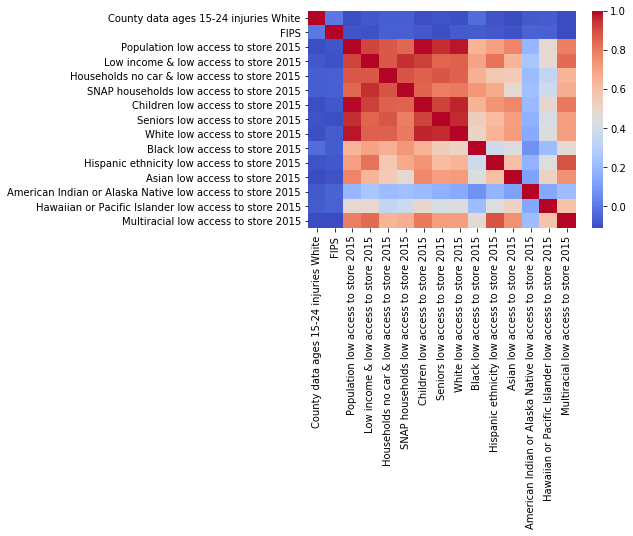

In [44]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 15-24 injuries White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

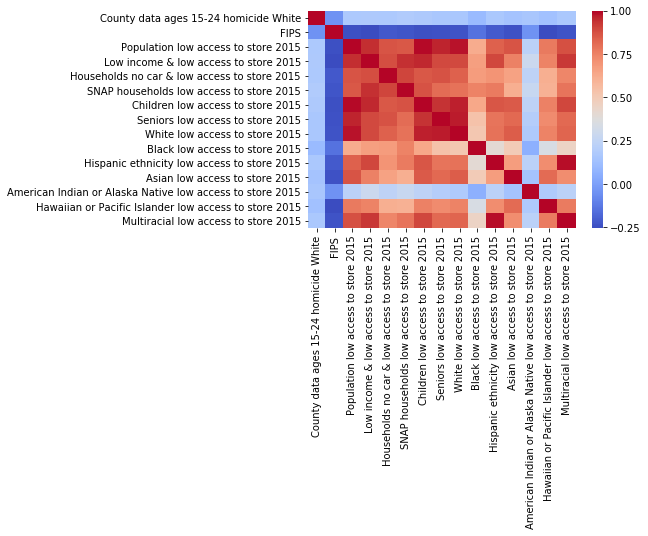

In [45]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 15-24 homicide White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

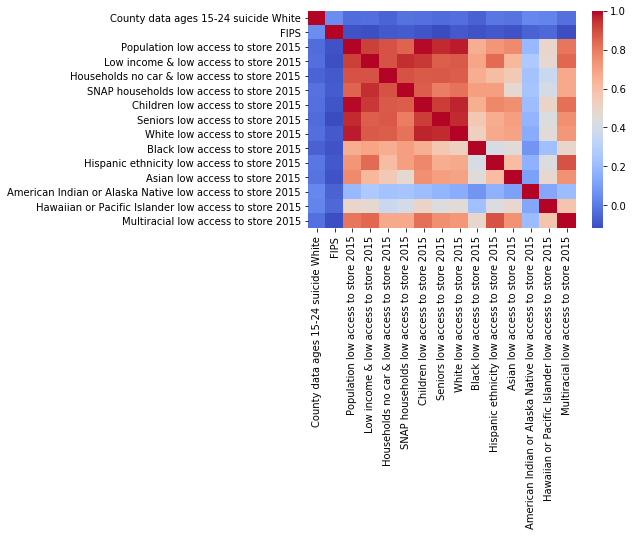

In [46]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 15-24 suicide White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

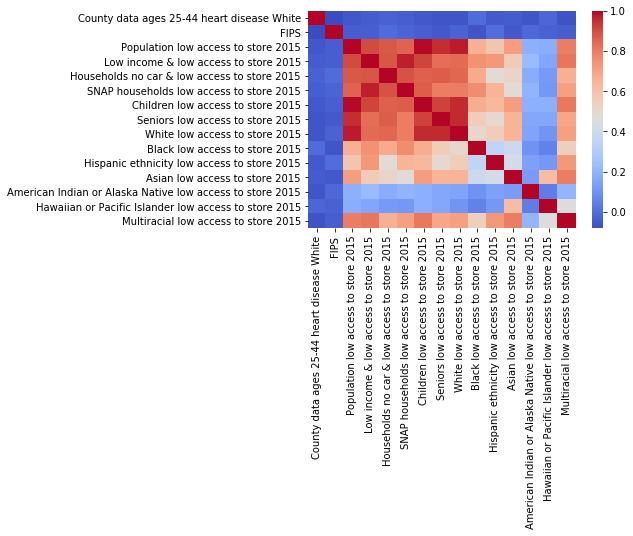

In [47]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 25-44 heart disease White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

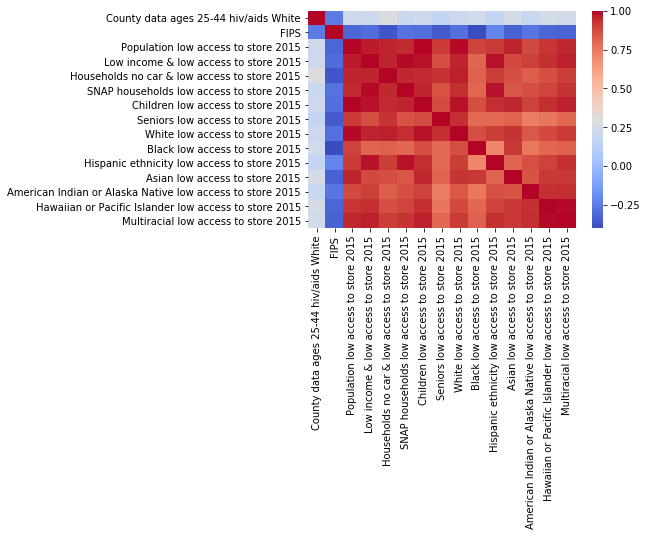

In [48]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 25-44 hiv/aids White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

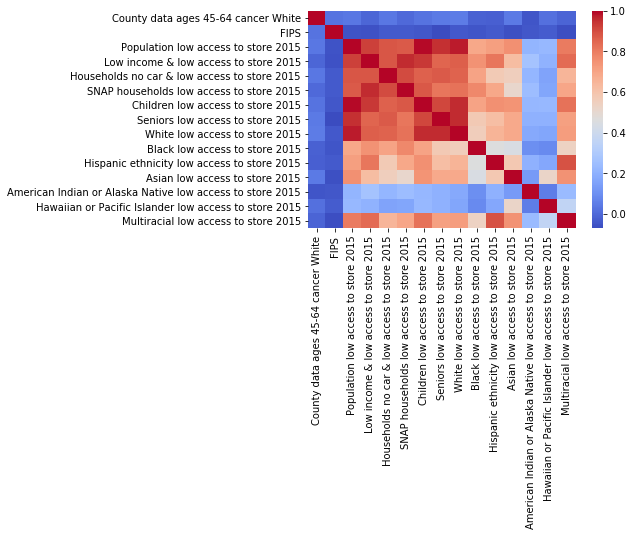

In [49]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 45-64 cancer White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

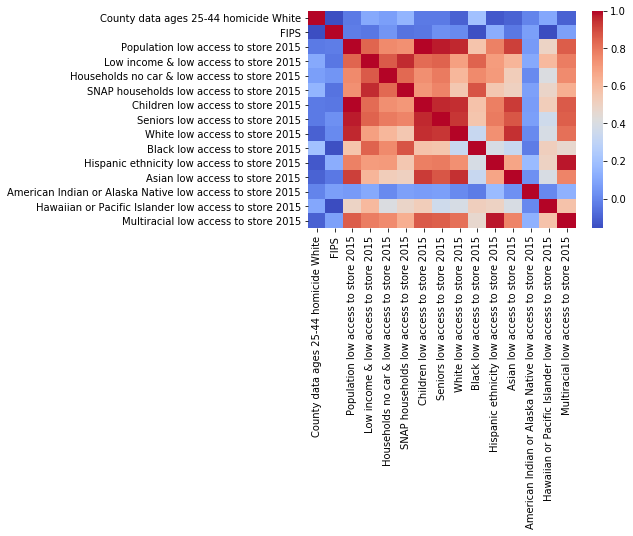

In [50]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 25-44 homicide White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

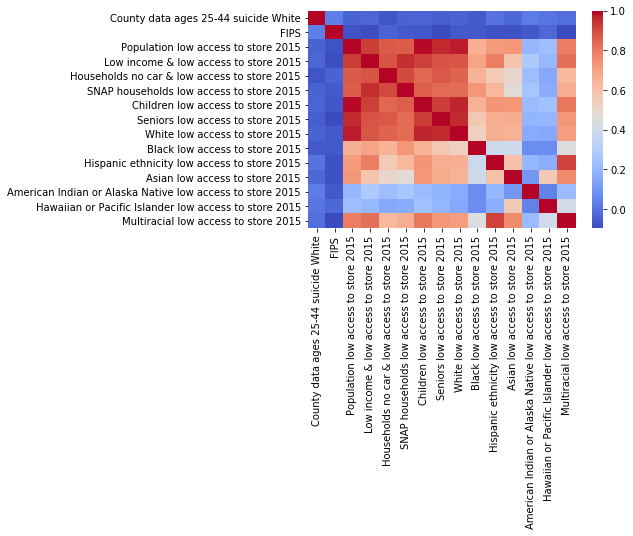

In [51]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 25-44 suicide White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

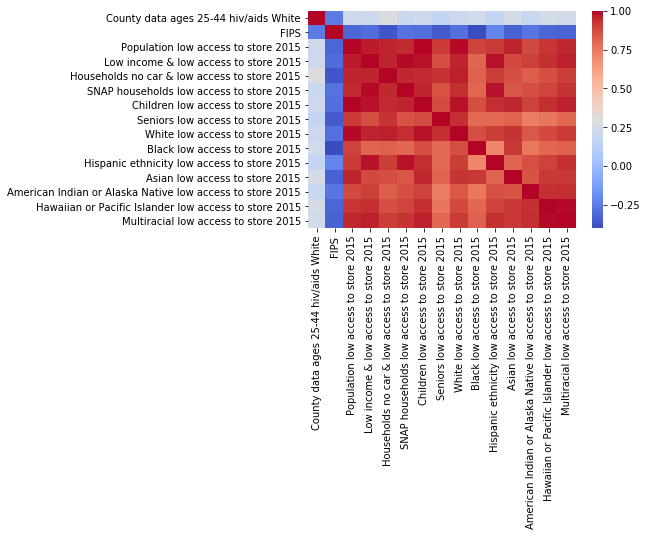

In [52]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 25-44 hiv/aids White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

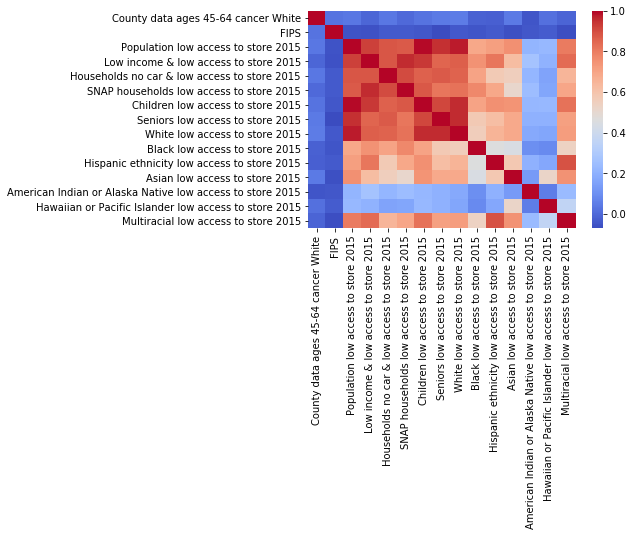

In [53]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 45-64 cancer White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

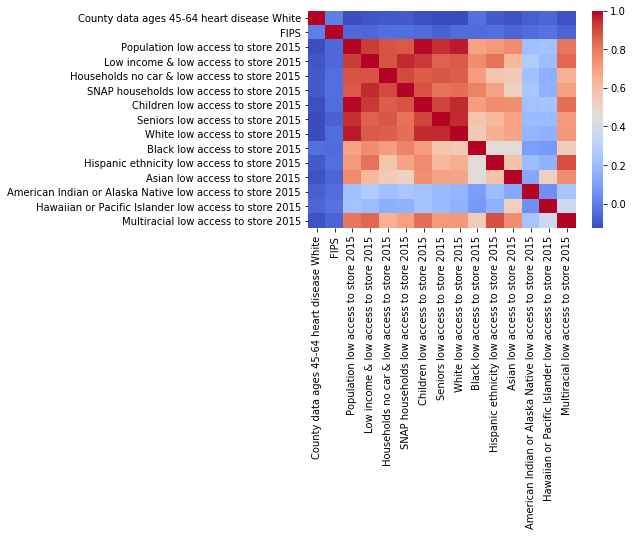

In [54]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 45-64 heart disease White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

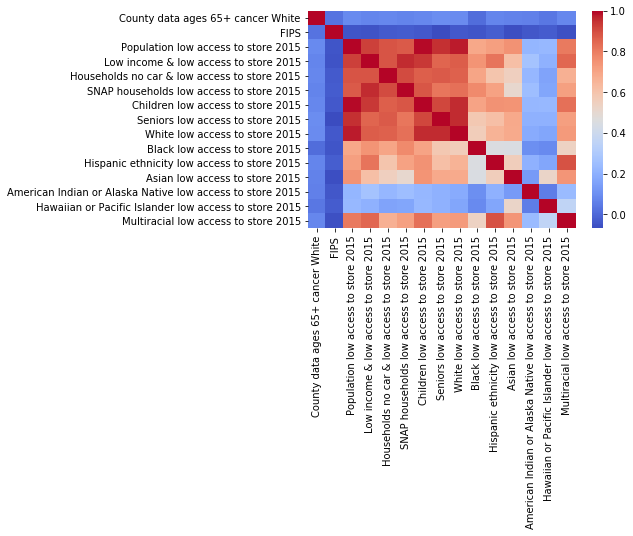

In [55]:
temp_df = df_leadDeath[['State_FIPS_Code',
                      'County_FIPS_Code',
                      'CHSI_County_Name',
                      'CHSI_State_Name',
                      'CHSI_State_Abbr',
                      'Strata_ID_Number',
                      'County data ages 65+ cancer White']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

Out of all the correlation heatmaps done 'County data ages 25-44 hiv/aids White' and 'County data ages 1-14 homicide White' had the most correlation. However, this could have been from the low amount of available data within both of those datasets. When I ran multiple sets together the amount of missing data caused zero fill errors, that's why they maps were run individually. Further analysis would require imputing data.

In [56]:
df_healthIndicate = pd.read_csv('RELATIVEHEALTHIMPORTANCE_cleaned.csv')

In [57]:
df_healthIndicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
State_FIPS_Code                                                  3141 non-null int64
County_FIPS_Code                                                 3141 non-null int64
CHSI_County_Name                                                 3141 non-null object
CHSI_State_Name                                                  3141 non-null object
CHSI_State_Abbr                                                  3141 non-null object
Strata_ID_Number                                                 3141 non-null int64
Relative health indicator low birth wt. (<2500 g)                3111 non-null float64
Relative health indicator very low birth wt. (<1500 g)           2927 non-null float64
Relative health indicator premature births (<37 weeks)           3125 non-null float64
Relative health indicator  births to women under 18              3063 non-null float64
Relative health indicator births

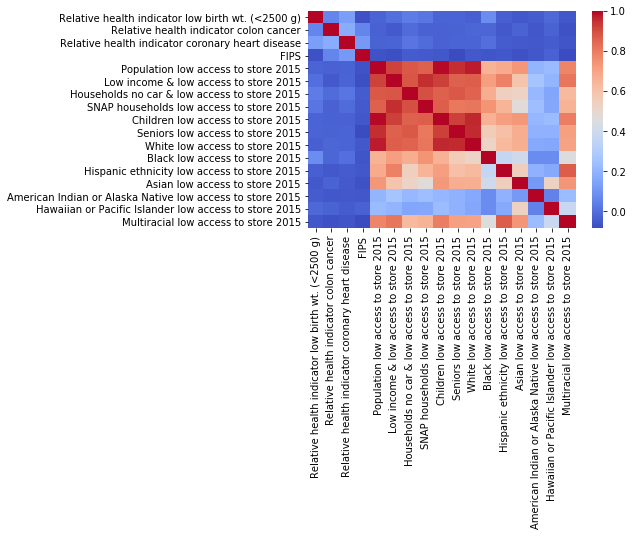

In [58]:
temp_df = df_healthIndicate[['State_FIPS_Code',
                             'County_FIPS_Code',
                             'CHSI_County_Name',
                             'CHSI_State_Name',
                             'CHSI_State_Abbr',
                             'Strata_ID_Number',
                             'Relative health indicator low birth wt. (<2500 g)',
                             'Relative health indicator colon cancer',
                             'Relative health indicator coronary heart disease']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

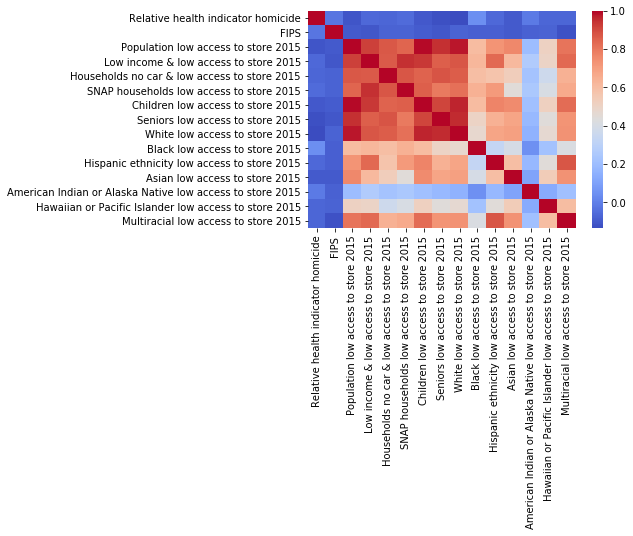

In [59]:
temp_df = df_healthIndicate[['State_FIPS_Code',
                             'County_FIPS_Code',
                             'CHSI_County_Name',
                             'CHSI_State_Name',
                             'CHSI_State_Abbr',
                             'Strata_ID_Number',
                             'Relative health indicator homicide']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

In [60]:
df_vuner = pd.read_csv('VUNERABLEPOPSANDENVHEALTH_cleaned.csv')

In [61]:
df_vuner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
State_FIPS_Code                                                                    3141 non-null int64
County_FIPS_Code                                                                   3141 non-null int64
CHSI_County_Name                                                                   3141 non-null object
CHSI_State_Name                                                                    3141 non-null object
CHSI_State_Abbr                                                                    3141 non-null object
Strata_ID_Number                                                                   3141 non-null int64
County data no high school diploma (among adults age 25 and older)                 3140 non-null float64
County data unemployed                                                             3133 non-null float64
County data severely work disabled                            

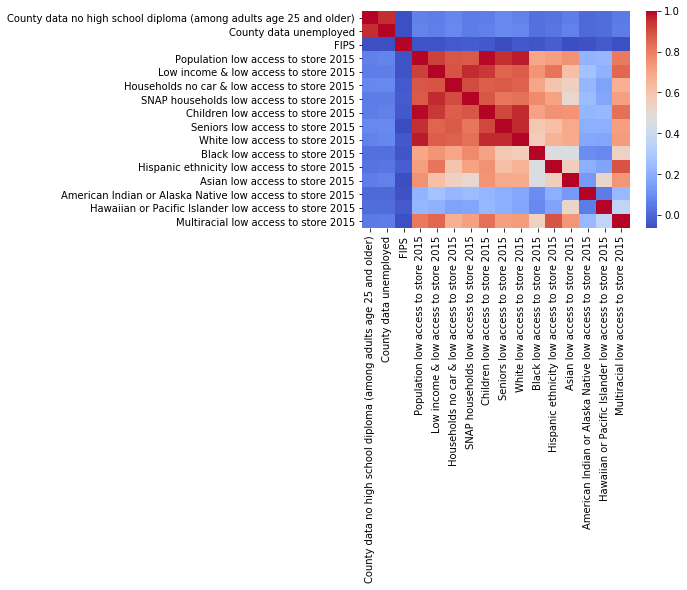

In [62]:
temp_df = df_vuner[['State_FIPS_Code',
                             'County_FIPS_Code',
                             'CHSI_County_Name',
                             'CHSI_State_Name',
                             'CHSI_State_Abbr',
                             'Strata_ID_Number',
                             'County data no high school diploma (among adults age 25 and older)',
                             'County data unemployed']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

In [63]:
df_risk = pd.read_csv('RISKFACTORSANDACCESSTOCARE_cleaned.csv')

In [64]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 31 columns):
State_FIPS_Code                                                             3141 non-null int64
County_FIPS_Code                                                            3141 non-null int64
CHSI_County_Name                                                            3141 non-null object
CHSI_State_Name                                                             3141 non-null object
CHSI_State_Abbr                                                             3141 non-null object
Strata_ID_Number                                                            3141 non-null int64
County data no exercise                                                     2206 non-null float64
Confidence interval lower limit no exercise                                 2206 non-null float64
Confidence interval upper limit no exercise                                 2206 non-null float64
County data few frui

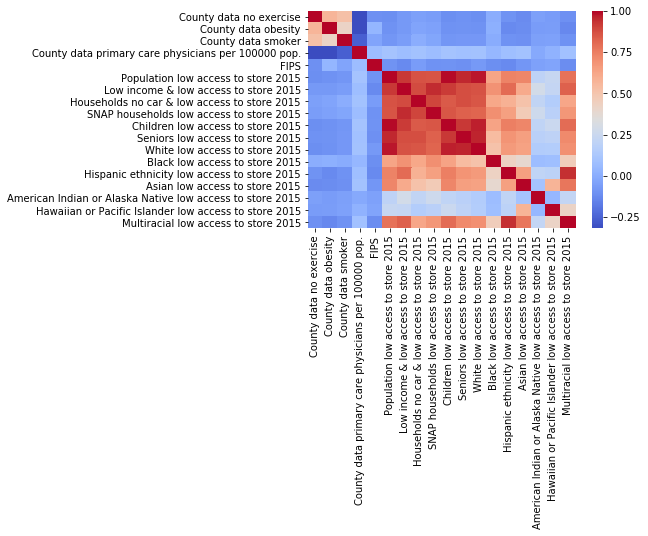

In [65]:
temp_df = df_risk[['State_FIPS_Code',
                   'County_FIPS_Code',
                   'CHSI_County_Name',
                   'CHSI_State_Name',
                   'CHSI_State_Abbr',
                   'Strata_ID_Number',
                   'County data no exercise',
                   'County data obesity',
                   'County data smoker',
                   'County data primary care physicians per 100000 pop.']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

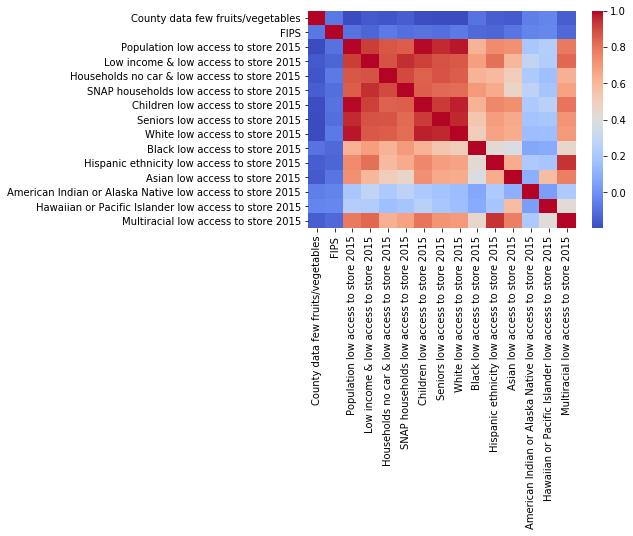

In [66]:
temp_df = df_risk[['State_FIPS_Code',
                   'County_FIPS_Code',
                   'CHSI_County_Name',
                   'CHSI_State_Name',
                   'CHSI_State_Abbr',
                   'Strata_ID_Number',
                   'County data few fruits/vegetables']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

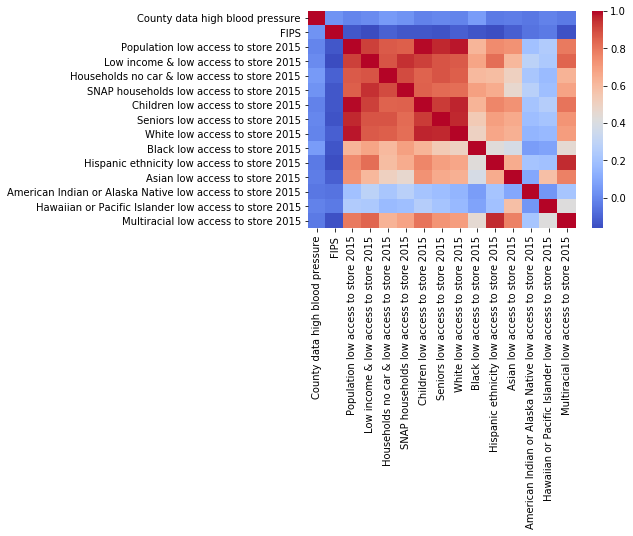

In [67]:
temp_df = df_risk[['State_FIPS_Code',
                   'County_FIPS_Code',
                   'CHSI_County_Name',
                   'CHSI_State_Name',
                   'CHSI_State_Abbr',
                   'Strata_ID_Number',
                   'County data high blood pressure']].dropna(
    axis=0, how='any', thresh=None, subset=None, inplace=False)

temp_df = temp_df.join(df_access_2015)

temp_df = temp_df.drop(['State_FIPS_Code',
              'County_FIPS_Code',
              'CHSI_County_Name',
              'CHSI_State_Name',
              'CHSI_State_Abbr',
              'Strata_ID_Number'],axis=1)

sns.heatmap(temp_df.corr(),cmap='coolwarm',annot=False)

In [68]:
df_crime = pd.read_csv('crime_data_w_population_and_crime_rate_cleaned.csv')

In [69]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 25 columns):
county_name              3136 non-null object
Unnamed: 1               3136 non-null object
crime_rate_per_100000    3136 non-null float64
index                    3136 non-null int64
EDITION                  3136 non-null int64
PART                     3136 non-null int64
IDNO                     3136 non-null int64
CPOPARST                 3136 non-null int64
CPOPCRIM                 3136 non-null int64
AG_ARRST                 3136 non-null int64
AG_OFF                   3136 non-null int64
COVIND                   3136 non-null float64
INDEX                    3136 non-null int64
MODINDX                  3136 non-null int64
MURDER                   3136 non-null int64
RAPE                     3136 non-null int64
ROBBERY                  3136 non-null int64
AGASSLT                  3136 non-null int64
BURGLRY                  3136 non-null int64
LARCENY                  3136 no

I changed the state and county format in excel; however, I forgot to rename the columns to match the format of my access dataset

In [70]:
df_crime.rename(columns={'county_name': 'County', 'Unnamed: 1': 'State'}, inplace=True)
df_crime.info

<bound method DataFrame.info of                     County State  crime_rate_per_100000  index  EDITION  PART  \
0                   Juneau    AK             352.112676    667        1     4   
1                    Sitka    AK             133.037694   2018        1     4   
2                  Yakutat    AK               0.000000   3000        1     4   
3               Dillingham    AK             938.123753     31        1     4   
4                   Bethel    AK             275.931974   1001        1     4   
5                     Nome    AK             232.511120   1267        1     4   
6           Valdez-Cordova    AK             184.369558   1583        1     4   
7            Yukon-Koyukuk    AK               0.000000   2978        1     4   
8         Northwest Arctic    AK            1014.964216     21        1     4   
9            Kodiak Island    AK             856.031128     44        1     4   
10             North Slope    AK             722.692546     84        1     4

In [71]:
df_crime = df_crime.drop(['index',
                          'EDITION',
                          'PART',
                          'IDNO',
                          'INDEX',
                          'MODINDX',
                          'FIPS_ST',
                          'FIPS_CTY'],axis=1)

In [72]:
df_crime = pd.merge(df_crime, df_access_2015, how='right', on=['County', 'State'])

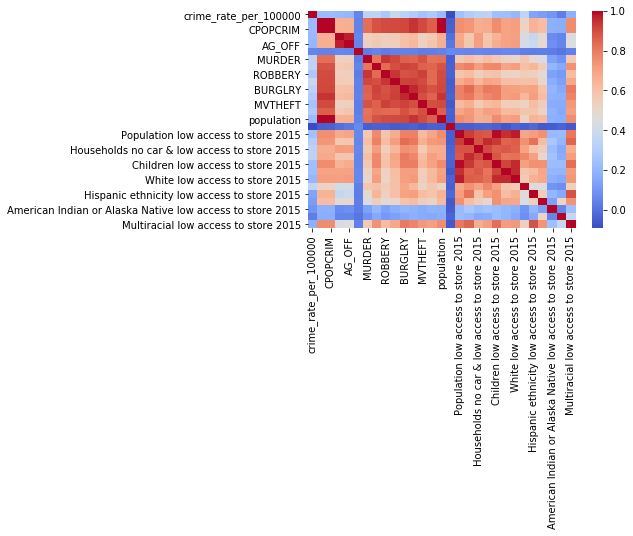

In [73]:
sns.heatmap(df_crime.corr(),cmap='coolwarm',annot=False)

At this point, the data of crime shows a much stronger correlation with regards to food access than food access shows to adverse health outcomes unless those health outcomes are in relation to a crime. Here is where I decided to change my original idea of modeling adverse health outcomes to modeling what food stores would close. Using a model predicting what stores would close officials can organize neighborhood watches with those stores as the starting and ending point for the watch.